In [1]:
# Se importan las librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
import b_funciones as fn
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
#Carga de datos
X_m1 = pd.read_csv("Tablas\X_m1.csv", sep= ',')
X_m2 = pd.read_csv("Tablas\X_m2.csv", sep= ',')
X_m3 = pd.read_csv("Tablas\X_m3.csv", sep= ',')
y = pd.read_csv("Tablas\y.csv", sep= ',')

In [3]:
var_names=X_m1.columns
joblib.dump(var_names, 'pkls\ var_names.pkl')

['pkls\\ var_names.pkl']

In [4]:
X_m1.drop(['Unnamed: 0'],axis=1, inplace=True)
X_m2.drop(['Unnamed: 0'],axis=1, inplace=True)
X_m3.drop(['Unnamed: 0'],axis=1, inplace=True)
y.drop(['Unnamed: 0'],axis=1, inplace=True)

In [5]:
#Creacion modelo DecisionTreeClassifier
m1_clf=tree.DecisionTreeClassifier()

#Creacion modelo GradientBoostingClassifier
m1_gboos=GradientBoostingClassifier()

#Creacion modelo RandomForestClassifier
m1_ranfor=RandomForestClassifier()

#lista de modelos
m1=([m1_clf, m1_gboos, m1_ranfor])

<h1> Modelos con variables seleccionadas mediante VarianceThreshold 

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

<Axes: >

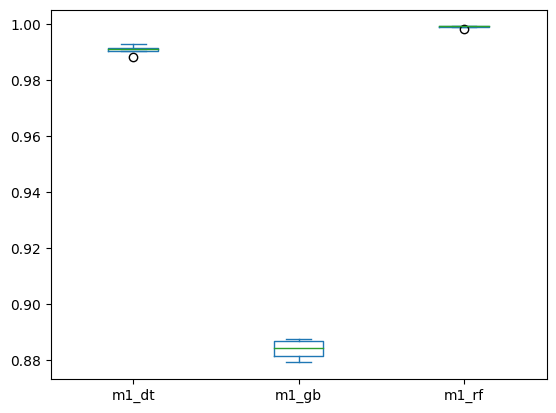

In [6]:
#Hacer medicion modelos con cross validation
rmse1=fn.medir_modelos(m1,'accuracy',X_m1,y,4)

#imprimir grafico
rmse1.plot(kind='box')

<h1> Modelos con variables seleccionadas mediante Matriz de correlacion

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

<Axes: >

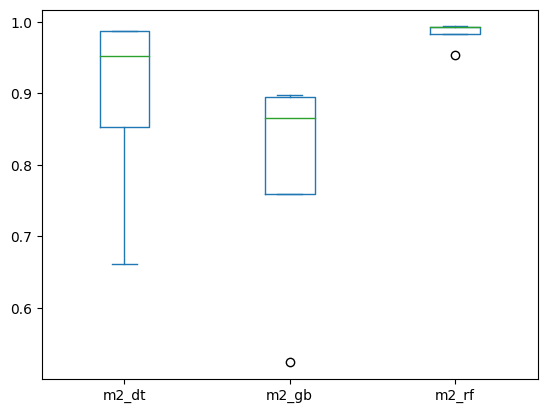

In [7]:
rmse2=fn.medir_modelos(m1,'accuracy',X_m2,y,4)
rmse2=rmse2.rename(columns={'m1_dt':'m2_dt','m1_gb':'m2_gb','m1_rf':'m2_rf'})
rmse2.plot(kind='box')

<h1> Modelos con variables seleccionadas mediante combinacion de las 2 tecnicas anteriores

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

<Axes: >

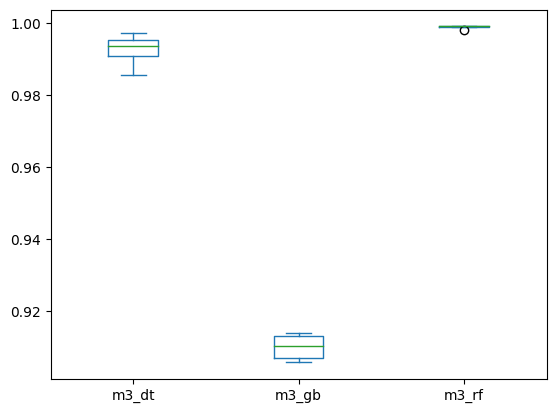

In [8]:
rmse3=fn.medir_modelos(m1,'accuracy',X_m3,y,4)
rmse3=rmse3.rename(columns={'m1_dt':'m3_dt','m1_gb':'m3_gb','m1_rf':'m3_rf'})
rmse3.plot(kind='box')

<h1> Comparacion de modelos

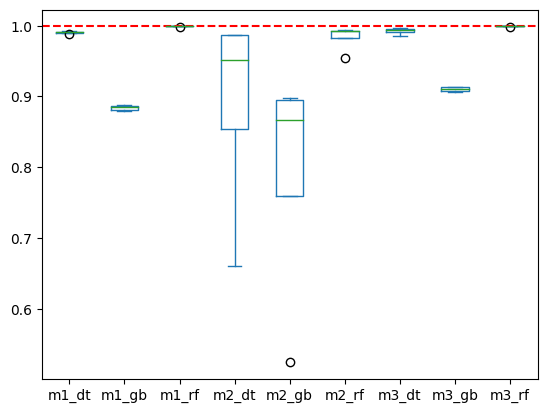

In [9]:
# Concatenar los DataFrames en uno solo
rmse = pd.concat([rmse1, rmse2, rmse3], axis=1)

# Crear el gráfico de caja
ax = rmse.plot(kind='box')

# Agregar una línea punteada en y=1 paralela al eje x
ax.axhline(y=1, color='r', linestyle='--')

# Mostrar el gráfico
plt.show()

Se decidio ver cual modelo tenia menos variables para seleccionarlo ya que los modelos de RandomForestClassifier, con el conjunto de variables 1 y 3 quedaron empatados. Esto nos podria entregar una optimizacion en el tiempo de procesamiento ya que se tienen menor numero de variables

In [10]:
print(len(X_m1.columns)," Numero de variables del conjunto de datos 1")
print(len(X_m3.columns)," Numero de variables del conjunto de datos 3")

36  Numero de variables del conjunto de datos 1
44  Numero de variables del conjunto de datos 3


In [11]:
#separacion de datos
X_train,X_test,y_train,y_test=train_test_split(X_m1,y,test_size=0.2,random_state=0)

In [12]:
#Creacion modelo RandomForestClassifier
m1_ranfor=RandomForestClassifier()
m1_ranfor.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [13]:
#Metricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, m1_ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, m1_ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, m1_ranfor.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, m1_ranfor.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2962
           1       1.00      1.00      1.00       566

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9931972789115646
Test - classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       737
           1       1.00      0.96      0.98       145

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



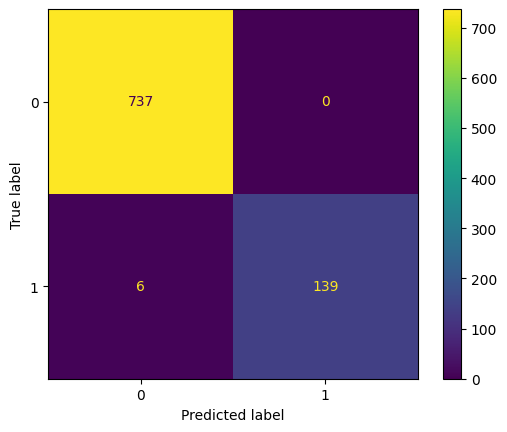

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Matriz de confusión
cm1=confusion_matrix(y_test,m1_ranfor.predict(X_test))
# Visualización de la matriz de confusión
cm1_display=ConfusionMatrixDisplay(confusion_matrix=cm1)
cm1_display.plot()
plt.show()

In [15]:
#Importacia de cada factor 
columns=pd.DataFrame(X_m1.columns).rename(columns={0:'columns'})
#Creación del Data frame con el nivel de importacia
importances=pd.DataFrame(m1_ranfor.feature_importances_).rename(columns={0:'importances'})
cf=pd.concat([columns,importances], axis=1)

#Se organiza el Dataframe de mayor a menor y se escoge el top 10
cf=cf.sort_values('importances',ascending=False).head(10)


#Creación del gráfico
fig = px.bar(cf, x='importances', y='columns', color = 'columns',  title ='<b>Importancia de los factores que analiza el modelo  (Top 10) <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'simple_white',
    title_x = 0.5,
    showlegend=False)